In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Cleaned.csv")

C:\Users\ajed8\AppData\Local\Temp\ipykernel_18212\825547690.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


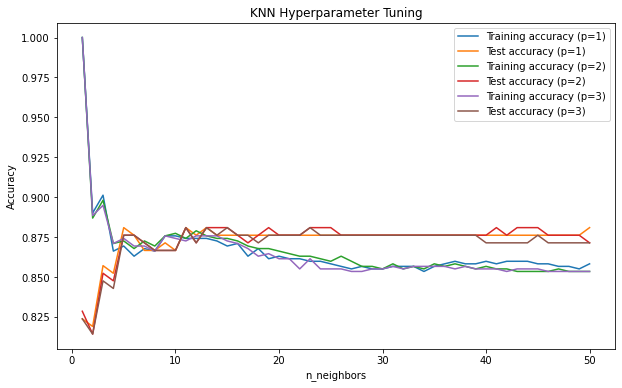

In [9]:
X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 51)
p_values = [1, 2, 3]  # Add other possible values for p

for p in p_values:
    training_acc = []
    test_acc = []
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        clf.fit(X_train, y_train)
        training_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    training_accuracy.append(training_acc)
    test_accuracy.append(test_acc)

plt.figure(figsize=(10, 6))
for i, p in enumerate(p_values):
    plt.plot(neighbors_settings, training_accuracy[i], label=f"Training accuracy (p={p})")
    plt.plot(neighbors_settings, test_accuracy[i], label=f"Test accuracy (p={p})")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("KNN Hyperparameter Tuning")
plt.show()


C:\Users\ajed8\AppData\Local\Temp\ipykernel_18212\2171987321.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


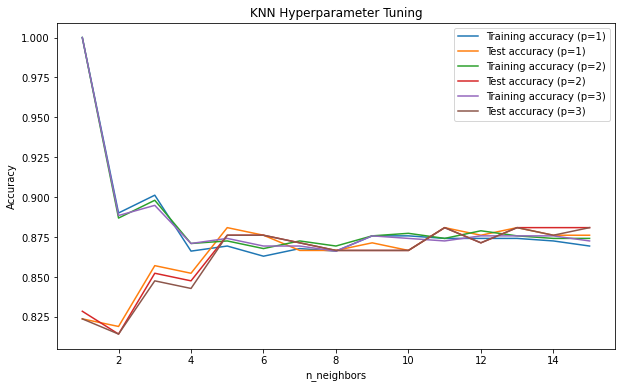

In [10]:
X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 16)
p_values = [1, 2, 3]  # Add other possible values for p

for p in p_values:
    training_acc = []
    test_acc = []
    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
        clf.fit(X_train, y_train)
        training_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    training_accuracy.append(training_acc)
    test_accuracy.append(test_acc)

plt.figure(figsize=(10, 6))
for i, p in enumerate(p_values):
    plt.plot(neighbors_settings, training_accuracy[i], label=f"Training accuracy (p={p})")
    plt.plot(neighbors_settings, test_accuracy[i], label=f"Test accuracy (p={p})")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title("KNN Hyperparameter Tuning")
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

# Define the parameter grid for grid search
param_grid = {'n_neighbors': range(1, 15),
              'p': [1, 2, 3]}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Fit the model with the best hyperparameters using the combined training and validation sets
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(np.vstack((X_train, X_val)), np.concatenate((y_train, y_val)))

# Evaluate the model on the test set
test_accuracy = best_knn.score(X_test, y_test)

print("Test Accuracy:", test_accuracy)


C:\Users\ajed8\AppData\Local\Temp\ipykernel_18212\159937275.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


Best Hyperparameters: {'n_neighbors': 13, 'p': 2}
Best Score: 0.8555851063829787
Test Accuracy: 0.8809523809523809


C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


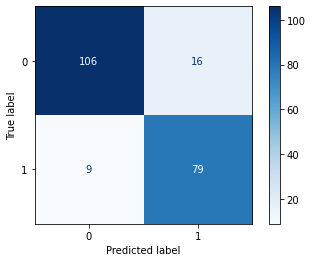

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_knn, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [13]:
#poduce f1 score
from sklearn.metrics import f1_score, classification_report
model=best_knn
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

0.8461538461538463
              precision    recall  f1-score   support

           0      0.905     0.861     0.882       122
           1      0.819     0.875     0.846        88

    accuracy                          0.867       210
   macro avg      0.862     0.868     0.864       210
weighted avg      0.869     0.867     0.867       210



The weighted average of precision, recall, and F1-score is calculated by weighting the metrics by the support (number of instances) of each class and then taking the average. In this case, the weighted average precision, recall, and F1-score are all 0.87.

Overall, the model demonstrates reasonably good performance with respectable precision, recall, and F1-score values for both classes.

In [8]:
import joblib

joblib.dump(best_knn, 'best_knn_model.pkl')

['best_knn_model.pkl']

In [14]:
y_scores = best_knn.predict_proba(X)[:, 1]

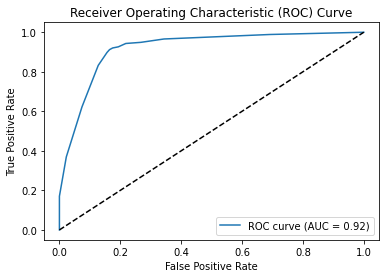

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [16]:
auc

0.9188119622147402